# **GALAXY MORPHOLOGY CLASSIFICATION USING DEEP LEARNING AND EXPLAINABLE AI**

## **1. Import Libraries and Initial Loading**

In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.9 MB/s eta 0:00:00


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import tensorflow as tf
from google.colab import drive
import cv2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers, models, optimizers, regularizers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
import random
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.models import load_model
import pickle

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_images_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1/images_training_rev1"
labels_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1/training_solutions_rev1.csv"

## **2. Preprocessing**

### **2.1 Labels**

In [5]:
# Load labels
labels_df = pd.read_csv(labels_path)

In [6]:
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [7]:
labels_df.shape

(61578, 38)

In [8]:
labels_df['image_path'] = labels_df['GalaxyID'].astype(str) + '.jpg'
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [9]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GalaxyID    61578 non-null  int64  
 1   Class1.1    61578 non-null  float64
 2   Class1.2    61578 non-null  float64
 3   Class1.3    61578 non-null  float64
 4   Class2.1    61578 non-null  float64
 5   Class2.2    61578 non-null  float64
 6   Class3.1    61578 non-null  float64
 7   Class3.2    61578 non-null  float64
 8   Class4.1    61578 non-null  float64
 9   Class4.2    61578 non-null  float64
 10  Class5.1    61578 non-null  float64
 11  Class5.2    61578 non-null  float64
 12  Class5.3    61578 non-null  float64
 13  Class5.4    61578 non-null  float64
 14  Class6.1    61578 non-null  float64
 15  Class6.2    61578 non-null  float64
 16  Class7.1    61578 non-null  float64
 17  Class7.2    61578 non-null  float64
 18  Class7.3    61578 non-null  float64
 19  Class8.1    61578 non-nul

In [10]:
# missing values
missing_values = labels_df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)

if missing_values.sum() > 0:
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values in the dataset.")

Missing Values in Each Column:
GalaxyID      0
Class1.1      0
Class1.2      0
Class1.3      0
Class2.1      0
Class2.2      0
Class3.1      0
Class3.2      0
Class4.1      0
Class4.2      0
Class5.1      0
Class5.2      0
Class5.3      0
Class5.4      0
Class6.1      0
Class6.2      0
Class7.1      0
Class7.2      0
Class7.3      0
Class8.1      0
Class8.2      0
Class8.3      0
Class8.4      0
Class8.5      0
Class8.6      0
Class8.7      0
Class9.1      0
Class9.2      0
Class9.3      0
Class10.1     0
Class10.2     0
Class10.3     0
Class11.1     0
Class11.2     0
Class11.3     0
Class11.4     0
Class11.5     0
Class11.6     0
image_path    0
dtype: int64

No missing values in the dataset.


### **2.2 Images**

In [12]:
# number of images
train_image_count = len(os.listdir(train_images_path))

print(f"Number of images in training folder: {train_image_count}")

Number of images in training folder: 61578


In [13]:
# list of image file names in the training folder
training_images = set(os.listdir(train_images_path))

filtered_labels_df = labels_df[labels_df['image_path'].isin(training_images)].copy()

filtered_labels_df.reset_index(drop=True, inplace=True)

print(f"Number of images in training folder: {len(training_images)}")
print(f"Number of rows in filtered_labels_df: {filtered_labels_df.shape[0]}")
filtered_labels_df.head()

Number of images in training folder: 61578
Number of rows in filtered_labels_df: 61578


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [14]:
def refine_classification(row):
    if row['Class1.2'] >= 0.9:
        return 'Spiral'
    elif row['Class1.1'] >= 0.9:
        return 'Elliptical'
    elif row['Class8.3'] > 0.5 or row['Class8.4'] > 0.5 or row['Class8.5'] > 0.5:
        return 'Irregular'
    else:
        return None

filtered_labels_df['Galaxy_Type'] = filtered_labels_df.apply(refine_classification, axis=1)

filtered_galaxies_df = filtered_labels_df[filtered_labels_df['Galaxy_Type'].notna()]

print(filtered_galaxies_df['Galaxy_Type'].value_counts())


Galaxy_Type
Spiral        8776
Elliptical    2517
Irregular      465
Name: count, dtype: int64


In [15]:
spiral_elliptical_df = filtered_galaxies_df[filtered_galaxies_df['Galaxy_Type'].isin(['Spiral', 'Elliptical'])]

print(spiral_elliptical_df.head())

print(len(spiral_elliptical_df))

    GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
4     100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
8     100134  0.021834  0.976952  0.001214  0.021751  0.955201  0.313077   
19    100322  0.091987  0.908013  0.000000  0.816806  0.091207  0.000000   
22    100380  0.030000  0.970000  0.000000  0.043650  0.926350  0.463175   
35    100520  0.042430  0.957570  0.000000  0.579788  0.377782  0.103912   

    Class3.2  Class4.1  Class4.2  ...  Class10.2  Class10.3  Class11.1  \
4   0.000000  0.000000  0.000000  ...   0.000000   0.000000        0.0   
8   0.642124  0.546491  0.408711  ...   0.152044   0.187194        0.0   
19  0.091207  0.000000  0.091207  ...   0.000000   0.000000        0.0   
22  0.463175  0.926350  0.000000  ...   0.463175   0.000000        0.0   
35  0.273870  0.148593  0.229189  ...   0.000000   0.148593        0.0   

    Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  image_path  \
4    0.000000   0.000000 

In [16]:
new_galaxy_df = spiral_elliptical_df[['GalaxyID','Galaxy_Type', 'image_path']]

print(new_galaxy_df.head())

    GalaxyID Galaxy_Type  image_path
4     100090  Elliptical  100090.jpg
8     100134      Spiral  100134.jpg
19    100322      Spiral  100322.jpg
22    100380      Spiral  100380.jpg
35    100520      Spiral  100520.jpg


In [18]:
# Save it to a CSV file if needed
new_galaxy_df.to_csv('spiral_elliptical.csv', index=False)

In [17]:
print(f'Total number of galaxies: {len(new_galaxy_df)}')

Total number of galaxies: 11293


In [19]:
label_encoder = LabelEncoder()
new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

print("Balanced DataFrame with Encoded Classes:")
print(new_galaxy_df.head())

Label Encoding Mapping:
{'Elliptical': 0, 'Spiral': 1}
Balanced DataFrame with Encoded Classes:
    GalaxyID Galaxy_Type  image_path  class_encoded
4     100090  Elliptical  100090.jpg              0
8     100134      Spiral  100134.jpg              1
19    100322      Spiral  100322.jpg              1
22    100380      Spiral  100380.jpg              1
35    100520      Spiral  100520.jpg              1


<ipython-input-19-a0979040eae3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])


## **3. EDA**

### **3.1 Distribution of galaxy types**

<ipython-input-41-e2ec3c004e84>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Galaxy_Type', data=new_galaxy_df, palette='Set2')


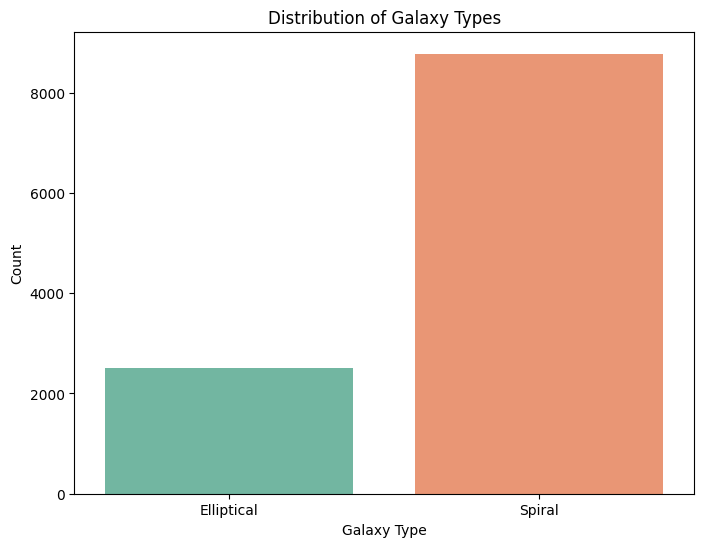

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Galaxy_Type', data=new_galaxy_df, palette='Set2')
plt.title('Distribution of Galaxy Types')
plt.xlabel('Galaxy Type')
plt.ylabel('Count')
plt.show()

### **3.2 Correlation Map**

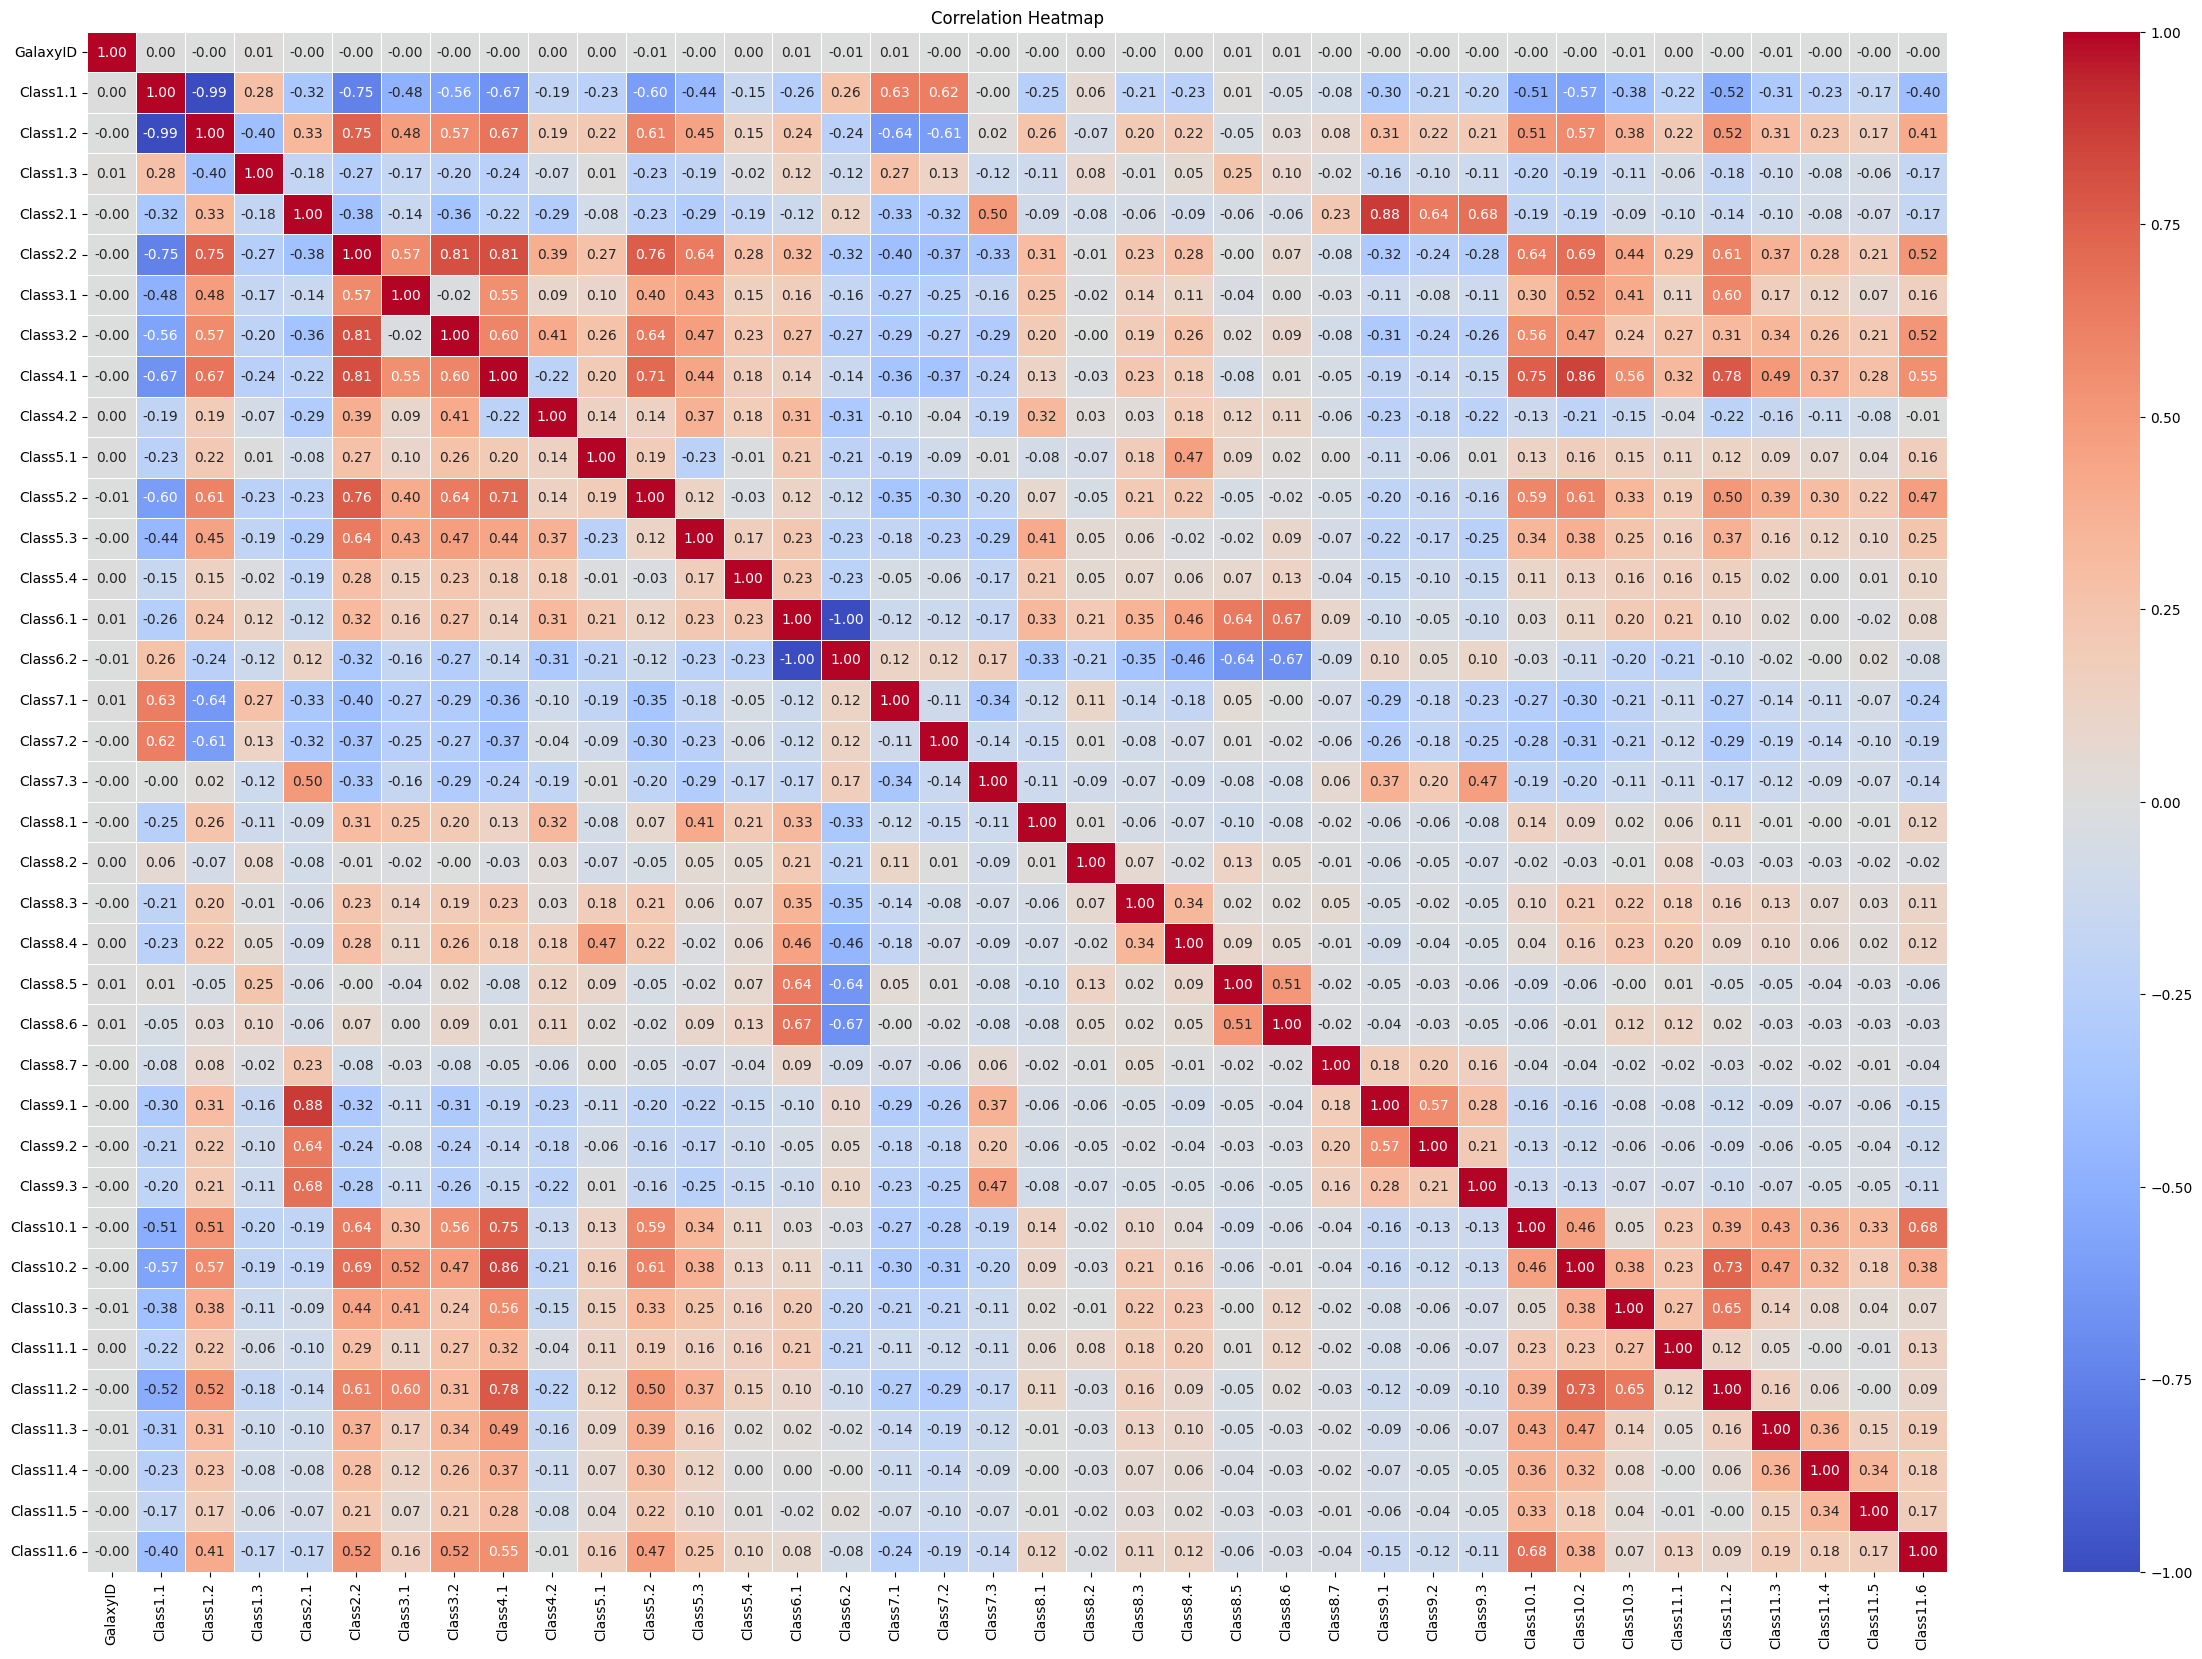

In [47]:
# Filter only numerical columns
numerical_columns = filtered_labels_df.select_dtypes(include=['number']).columns

# Compute the correlation matrix for the numerical columns
correlation_matrix = filtered_labels_df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### **3.3 Pixel Value Distribution**

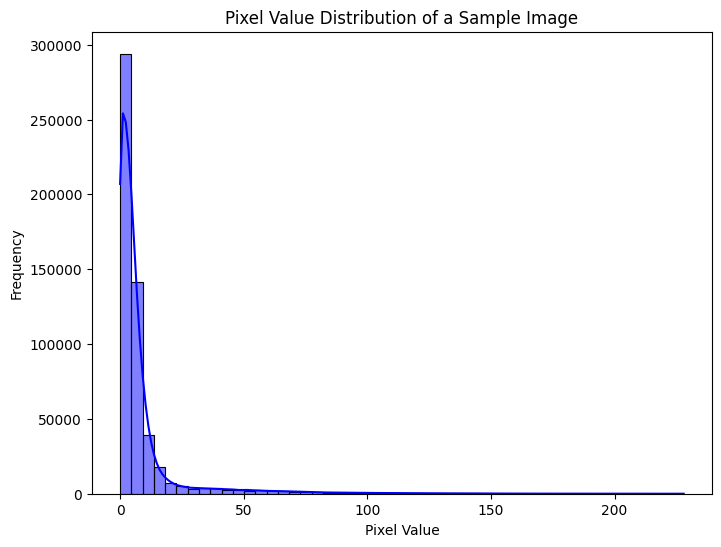

In [48]:
sample_image_path = os.path.join(train_images_path, new_galaxy_df['image_path'].iloc[0])
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Flatten the image to get pixel values
flattened_image = sample_image.flatten()

# Plot the distribution of pixel values
plt.figure(figsize=(8, 6))
sns.histplot(flattened_image, bins=50, kde=True, color='blue')
plt.title('Pixel Value Distribution of a Sample Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## **4. Data Splitting**

In [20]:
limited_data = []

for class_label in new_galaxy_df['class_encoded'].unique():
        class_data = new_galaxy_df[new_galaxy_df['class_encoded'] == class_label]
        class_data_limited = class_data.head(2500)
        limited_data.append(class_data_limited)
limited_df = pd.concat(limited_data)

In [21]:
class_distribution = limited_df['class_encoded'].value_counts()

print("Class Distribution in Limited DataFrame:")
print(class_distribution)

Class Distribution in Limited DataFrame:
class_encoded
0    2500
1    2500
Name: count, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split

X = limited_df['image_path']
y = limited_df['class_encoded']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

train_df = pd.DataFrame({'image_path': X_train, 'class_encoded': y_train})

val_df = pd.DataFrame({'image_path': X_val, 'class_encoded': y_val})

print("Training Set Class Distribution:")
print(train_df['class_encoded'].value_counts())

print("\nValidation Set Class Distribution:")
print(val_df['class_encoded'].value_counts())


Training Set Class Distribution:
class_encoded
1    2000
0    2000
Name: count, dtype: int64

Validation Set Class Distribution:
class_encoded
0    500
1    500
Name: count, dtype: int64


## **5. Augmentation**

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_df['class_encoded'] = train_df['class_encoded'].astype(str)
val_df['class_encoded'] = val_df['class_encoded'].astype(str)

# Train Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_images_path,
    x_col='image_path',
    y_col='class_encoded',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

# Validation Generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_images_path,
    x_col='image_path',
    y_col='class_encoded',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 4000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


## **6. Model 1: VGG16**

### **6.1 Implementation**

In [30]:
# --- CLASS WEIGHTS ---
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# --- BASE MODEL ---
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze convolutional base

# Add custom top layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='sigmoid')(x)

VGG16_model = Model(inputs=base_model.input, outputs=output)

Class weights: {0: 1.0, 1: 1.0}


### **6.2 Compile**

In [31]:
# Compile the model
VGG16_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


# model summary
VGG16_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

### **6.3 Training**

In [34]:
# Train the model with callbacks
history = VGG16_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/15
63/63 [==============================] - 526s 8s/step - loss: 0.5925 - accuracy: 0.6880 - val_loss: 0.4857 - val_accuracy: 0.7960 - lr: 1.0000e-04
Epoch 2/15
63/63 [==============================] - 108s 2s/step - loss: 0.5099 - accuracy: 0.7585 - val_loss: 0.4286 - val_accuracy: 0.8280 - lr: 1.0000e-04
Epoch 3/15
63/63 [==============================] - 106s 2s/step - loss: 0.4674 - accuracy: 0.7975 - val_loss: 0.3781 - val_accuracy: 0.8720 - lr: 1.0000e-04
Epoch 4/15
63/63 [==============================] - 107s 2s/step - loss: 0.4270 - accuracy: 0.8238 - val_loss: 0.3703 - val_accuracy: 0.8320 - lr: 1.0000e-04
Epoch 5/15
63/63 [==============================] - 108s 2s/step - loss: 0.4116 - accuracy: 0.8275 - val_loss: 0.3324 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 6/15
63/63 [==============================] - 107s 2s/step - loss: 0.3792 - accuracy: 0.8457 - val_loss: 0.3171 - val_accuracy: 0.8700 - lr: 1.0000e-04
Epoch 7/15
63/63 [==============================] - 

In [35]:
# Save the trained model to a file
VGG16_model.save('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/VGG16_modelv2.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **6.4 Validation**

In [23]:
# Load the VGG16 model
VGG16_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/VGG16_modelv2.h5')

In [36]:
# Evaluate the model on the test data
test_loss, test_accuracy = VGG16_model.evaluate(val_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


16/16 [==============================] - 17s 1s/step - loss: 0.2431 - accuracy: 0.8980
Test Loss: 0.24314534664154053
Test Accuracy: 0.8980000019073486


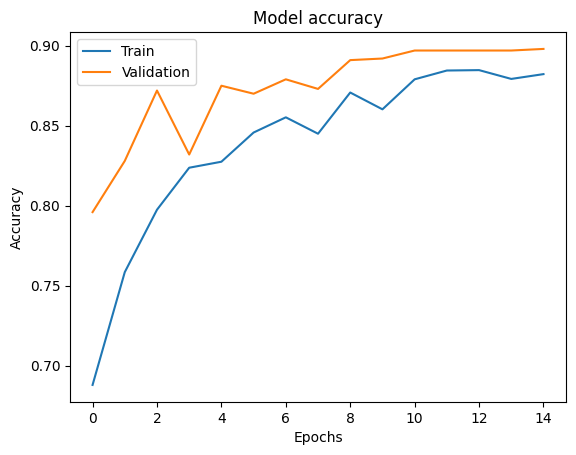

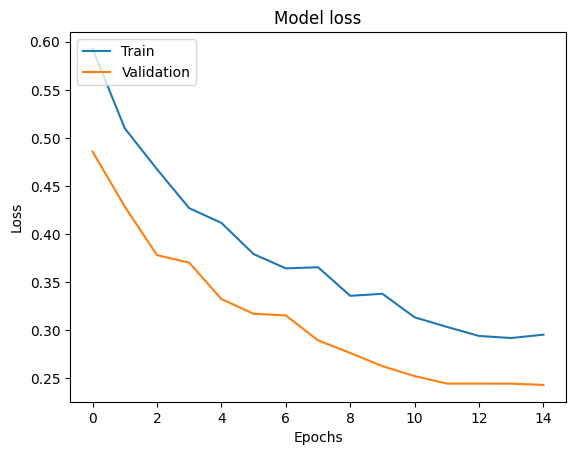

In [37]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### **6.5 Prediction**

1/1 [==============================] - 0s 449ms/step
Image: 339274.jpg
Predicted Class: Elliptical


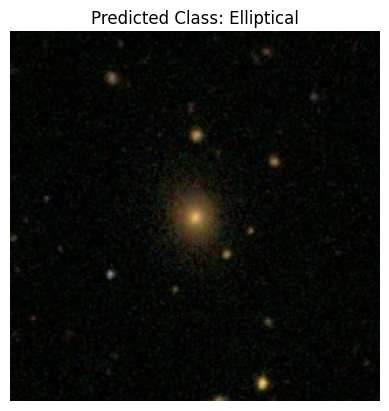

1/1 [==============================] - 0s 81ms/step
Image: 294333.jpg
Predicted Class: Spiral


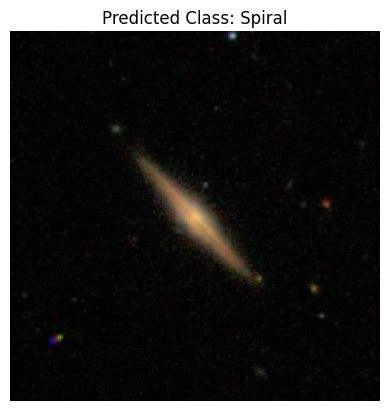

1/1 [==============================] - 0s 80ms/step
Image: 399321.jpg
Predicted Class: Elliptical


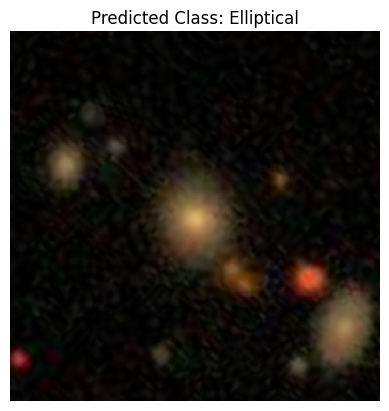

1/1 [==============================] - 0s 84ms/step
Image: 278242.jpg
Predicted Class: Spiral


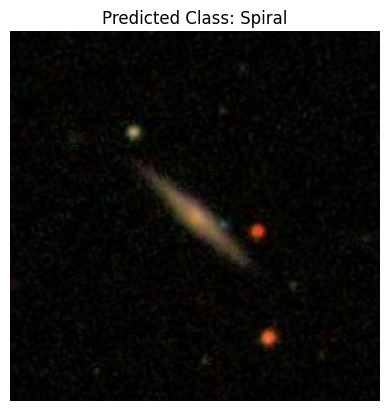

1/1 [==============================] - 0s 86ms/step
Image: 275941.jpg
Predicted Class: Spiral


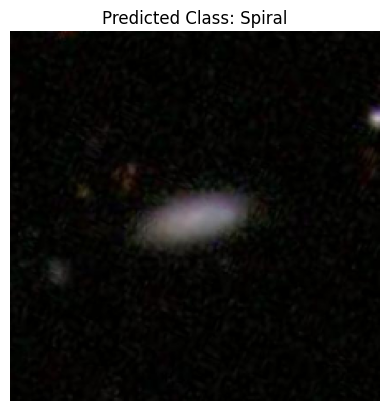

In [38]:
class_labels = {0: 'Elliptical', 1: 'Spiral'}

random_images = random.sample(list(val_df['image_path']), 5)

for image_filename in random_images:
    image_path = os.path.join(train_images_path, image_filename)

    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0) / 255.0


    prediction = VGG16_model.predict(image_array)
    predicted_class = np.argmax(prediction)

    predicted_label = class_labels[predicted_class]

    print(f"Image: {image_filename}")
    print(f"Predicted Class: {predicted_label}")

    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_label}")
    plt.axis('off')
    plt.show()

### **6.6 Evaluation**

16/16 [==============================] - 18s 1s/step


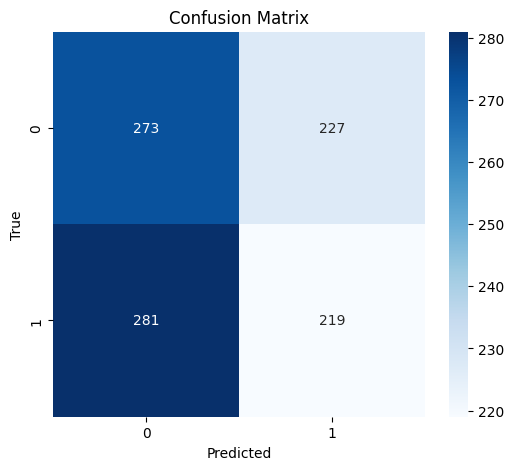

In [39]:
y_true = val_generator.classes
y_pred = VGG16_model.predict(val_generator)

y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
y_true = val_generator.classes
y_pred_classes = np.argmax(VGG16_model.predict(val_generator), axis=1)

class_labels = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

16/16 [==============================] - 18s 1s/step
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       500
           1       0.49      0.44      0.46       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



## **7. Model 2: RESNE50:**

### **7.1 Initialisation**

In [33]:
# --- CLASS WEIGHTS ---
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

# --- CALLBACKS ---
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# --- BASE MODEL ---
base_model_RESNET = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_RESNET.trainable = False  # Freeze convolutional base

# Add custom top layers
x_RESNET = Flatten()(base_model_RESNET.output)
x_RESNET = Dense(256, activation='relu')(x_RESNET)
x_RESNET = Dropout(0.5)(x_RESNET)
output_RESNET = Dense(2, activation='sigmoid')(x_RESNET)  # For binary classification

# Create the final model
RESNET50_model = Model(inputs=base_model_RESNET.input, outputs=output_RESNET)

### **7.2 Compile**

In [34]:
# Compile the model
RESNET50_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# model summary
RESNET50_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                           

In [35]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


### **7.3 Training**

In [36]:
history_RESNET50 = RESNET50_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

Epoch 1/15
63/63 [==============================] - 109s 2s/step - loss: 0.7005 - accuracy: 0.5235 - val_loss: 0.7023 - val_accuracy: 0.5000
Epoch 2/15
63/63 [==============================] - 104s 2s/step - loss: 0.6677 - accuracy: 0.5842 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 3/15
63/63 [==============================] - 105s 2s/step - loss: 0.6068 - accuracy: 0.6880 - val_loss: 0.7027 - val_accuracy: 0.5000
Epoch 4/15
63/63 [==============================] - 105s 2s/step - loss: 0.5353 - accuracy: 0.7465 - val_loss: 0.6753 - val_accuracy: 0.7080
Epoch 5/15
63/63 [==============================] - 104s 2s/step - loss: 0.4804 - accuracy: 0.7722 - val_loss: 0.6856 - val_accuracy: 0.5090
Epoch 6/15
63/63 [==============================] - 105s 2s/step - loss: 0.4382 - accuracy: 0.7997 - val_loss: 0.6961 - val_accuracy: 0.5260
Epoch 7/15
63/63 [==============================] - 104s 2s/step - loss: 0.4054 - accuracy: 0.8205 - val_loss: 0.6578 - val_accuracy: 0.5730
Epoch 8/15
63

In [37]:
# Save the trained model to a file
RESNET50_model.save('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/RESNETV2.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **7.4 Validation**

In [64]:
# Load the ResNet50 model
ResNet50_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/RESNETV2.h5')

In [45]:
# Evaluate the model on the test data
test_loss, test_accuracy = ResNet50_model.evaluate(val_generator)  # Replace with your actual test data generator
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


16/16 [==============================] - 19s 1s/step - loss: 0.3537 - accuracy: 0.8510
Test Loss: 0.3536619544029236
Test Accuracy: 0.8510000109672546


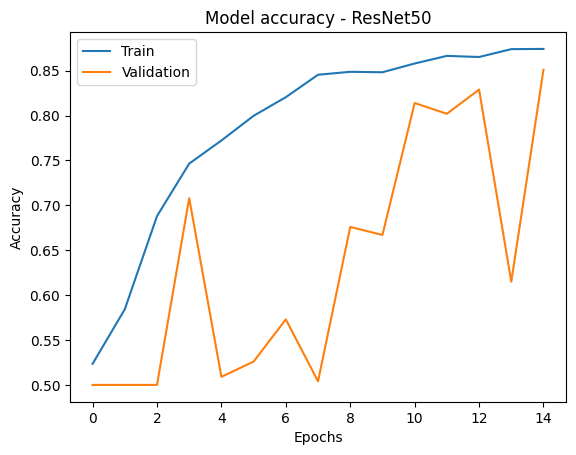

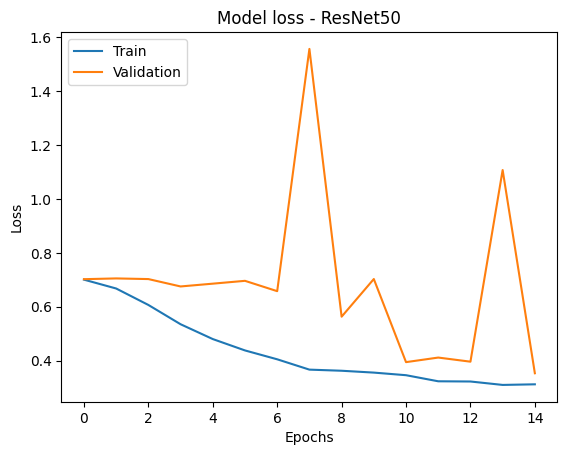

In [41]:
# Plot training & validation accuracy values
plt.plot(history_RESNET50.history['accuracy'])
plt.plot(history_RESNET50.history['val_accuracy'])
plt.title('Model accuracy - ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_RESNET50.history['loss'])
plt.plot(history_RESNET50.history['val_loss'])
plt.title('Model loss - ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **7.5 Prediction**

1/1 [==============================] - 1s 999ms/step
Image: 978937.jpg
Predicted Class: Elliptical


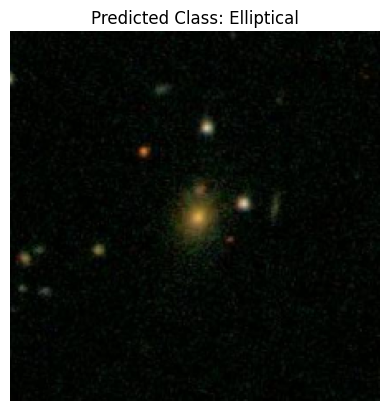

1/1 [==============================] - 0s 87ms/step
Image: 218573.jpg
Predicted Class: Spiral


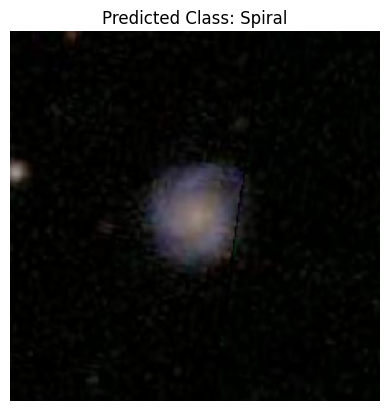

1/1 [==============================] - 0s 84ms/step
Image: 950850.jpg
Predicted Class: Elliptical


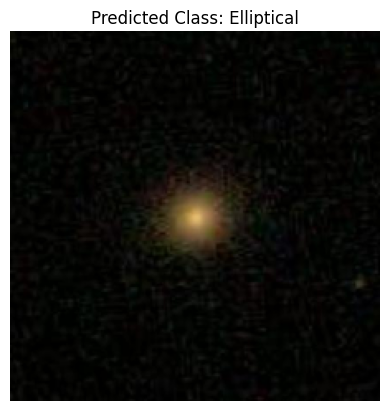

1/1 [==============================] - 0s 85ms/step
Image: 567635.jpg
Predicted Class: Elliptical


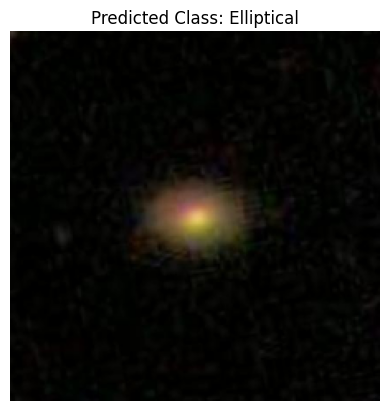

1/1 [==============================] - 0s 87ms/step
Image: 188009.jpg
Predicted Class: Spiral


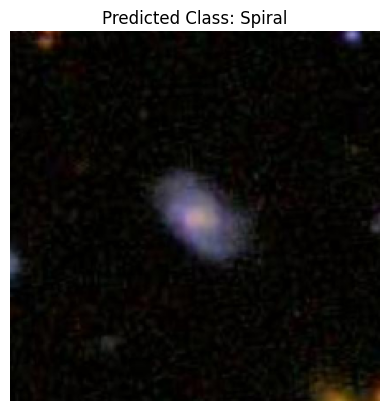

In [25]:
class_labels = {0: 'Elliptical', 1: 'Spiral'}

random_images = random.sample(list(val_df['image_path']), 5)

for image_filename in random_images:
    image_path = os.path.join(train_images_path, image_filename)

    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0) / 255.0


    prediction = ResNet50_model.predict(image_array)
    predicted_class = np.argmax(prediction)

    predicted_label = class_labels[predicted_class]

    print(f"Image: {image_filename}")
    print(f"Predicted Class: {predicted_label}")

    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_label}")
    plt.axis('off')
    plt.show()

### **7.6 Evaluation**

16/16 [==============================] - 218s 14s/step


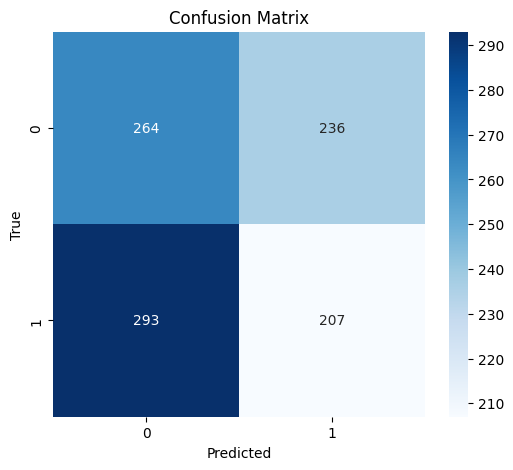

In [26]:
y_true = val_generator.classes
y_pred = ResNet50_model.predict(val_generator)

y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
y_true = val_generator.classes
y_pred_classes = np.argmax(ResNet50_model.predict(val_generator), axis=1)

class_labels = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

16/16 [==============================] - 17s 1s/step
              precision    recall  f1-score   support

           0       0.53      0.54      0.53       500
           1       0.53      0.52      0.52       500

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000



## **8. Model 3: Custom_CNN**

### **8.1 Initialisation**

In [50]:

# Define a simple Custom CNN model
def create_CUSTOM_CNN():
    model = models.Sequential()

    # Convolutional layers with ReLU activation
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))

    model.add(layers.Dense(2, activation='softmax'))

    return model

# Create the Custom CNN model
CUSTOM_CNN_model = create_CUSTOM_CNN()

### **8.2 Compile**

In [51]:
# Compile the model
CUSTOM_CNN_model.compile(
    loss="categorical_crossentropy",  # For multi-class classification
    optimizer=Adam(learning_rate=1e-5),  # Small learning rate for fine-tuning
    metrics=["accuracy"]
)

# Check the model summary
CUSTOM_CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [52]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### **8.3 Training**

In [53]:
# Train the model using the data generators
history_CUSTOM_CNN = CUSTOM_CNN_model.fit(
    train_generator,  # Replace with your actual training data generator
    epochs=15,
    validation_data=val_generator  # Replace with your actual validation data generator
)

Epoch 1/15
63/63 [==============================] - 81s 1s/step - loss: 0.6773 - accuracy: 0.5900 - val_loss: 0.6399 - val_accuracy: 0.7130
Epoch 2/15
63/63 [==============================] - 80s 1s/step - loss: 0.6009 - accuracy: 0.7460 - val_loss: 0.5406 - val_accuracy: 0.7570
Epoch 3/15
63/63 [==============================] - 80s 1s/step - loss: 0.5194 - accuracy: 0.7772 - val_loss: 0.5516 - val_accuracy: 0.7220
Epoch 4/15
63/63 [==============================] - 80s 1s/step - loss: 0.4814 - accuracy: 0.7955 - val_loss: 0.4840 - val_accuracy: 0.7720
Epoch 5/15
63/63 [==============================] - 80s 1s/step - loss: 0.4672 - accuracy: 0.8083 - val_loss: 0.5157 - val_accuracy: 0.7620
Epoch 6/15
63/63 [==============================] - 79s 1s/step - loss: 0.4509 - accuracy: 0.8108 - val_loss: 0.4731 - val_accuracy: 0.7930
Epoch 7/15
63/63 [==============================] - 79s 1s/step - loss: 0.4440 - accuracy: 0.8133 - val_loss: 0.4540 - val_accuracy: 0.8030
Epoch 8/15
63/63 [==

In [54]:
# Save the trained model to a file
CUSTOM_CNN_model.save('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/CUSTOM_CNNV2.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **8.4 Validation**

In [55]:
# Load the Custom CNN model
CUSTOM_CNN_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/CUSTOM_CNNV2.h5')

In [57]:
# Evaluate the model on the test data
test_loss, test_accuracy = CUSTOM_CNN_model.evaluate(val_generator)  # Replace with your actual test data generator
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


16/16 [==============================] - 6s 349ms/step - loss: 0.3859 - accuracy: 0.8390
Test Loss: 0.3859032690525055
Test Accuracy: 0.8389999866485596


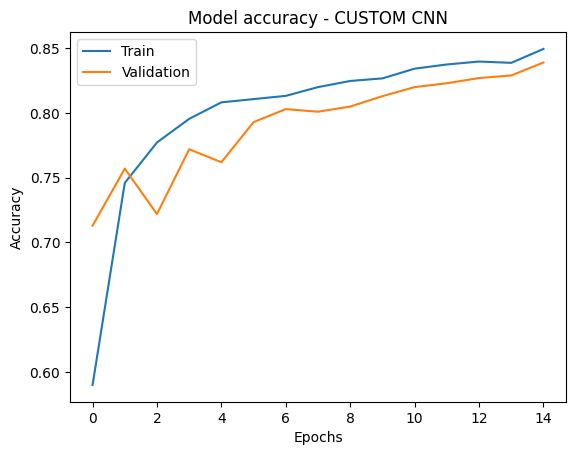

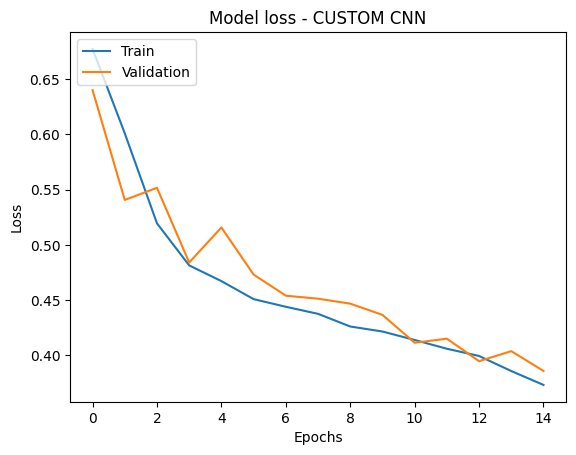

In [58]:
# Plot training & validation accuracy values
plt.plot(history_CUSTOM_CNN.history['accuracy'])
plt.plot(history_CUSTOM_CNN.history['val_accuracy'])
plt.title('Model accuracy - CUSTOM CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_CUSTOM_CNN.history['loss'])
plt.plot(history_CUSTOM_CNN.history['val_loss'])
plt.title('Model loss - CUSTOM CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **8.5 Prediction**

1/1 [==============================] - 0s 108ms/step
Image: 694356.jpg
Predicted Class: Elliptical


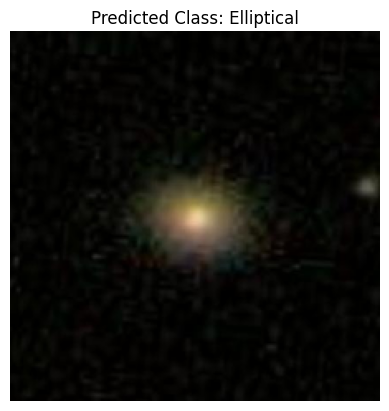

1/1 [==============================] - 0s 48ms/step
Image: 467059.jpg
Predicted Class: Spiral


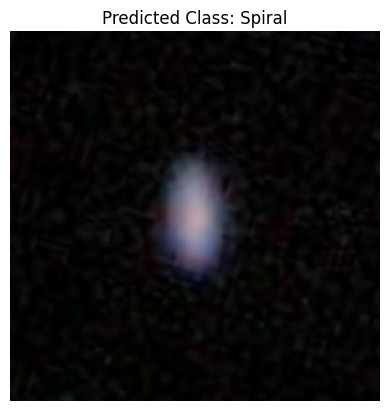

1/1 [==============================] - 0s 47ms/step
Image: 214878.jpg
Predicted Class: Spiral


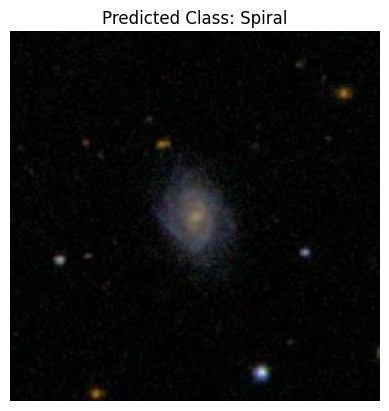

1/1 [==============================] - 0s 55ms/step
Image: 601271.jpg
Predicted Class: Elliptical


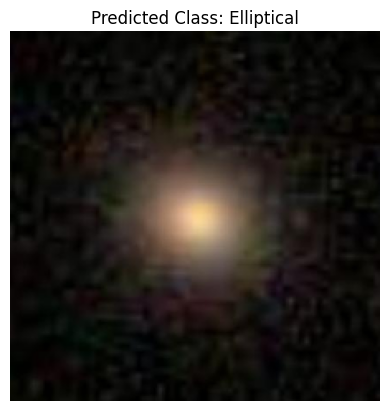

1/1 [==============================] - 0s 55ms/step
Image: 447782.jpg
Predicted Class: Elliptical


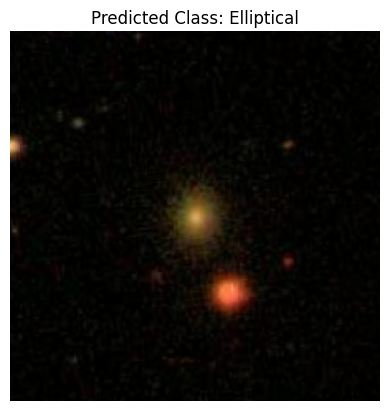

In [59]:
class_labels = {0: 'Elliptical', 1: 'Spiral'}

random_images = random.sample(list(val_df['image_path']), 5)

for image_filename in random_images:
    image_path = os.path.join(train_images_path, image_filename)

    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0) / 255.0


    prediction = CUSTOM_CNN_model.predict(image_array)
    predicted_class = np.argmax(prediction)

    predicted_label = class_labels[predicted_class]

    print(f"Image: {image_filename}")
    print(f"Predicted Class: {predicted_label}")

    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_label}")
    plt.axis('off')
    plt.show()

### **8.6 Evaluation**

16/16 [==============================] - 6s 350ms/step


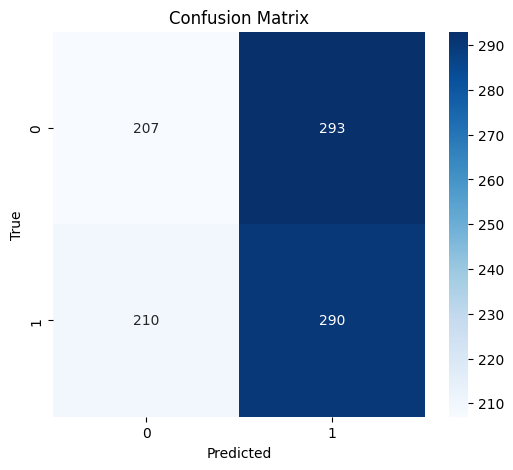

In [60]:
y_true = val_generator.classes
y_pred = CUSTOM_CNN_model.predict(val_generator)

y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [61]:
y_true = val_generator.classes
y_pred_classes = np.argmax(CUSTOM_CNN_model.predict(val_generator), axis=1)

class_labels = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

16/16 [==============================] - 6s 349ms/step
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       500
           1       0.51      0.59      0.54       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.51      0.51      0.50      1000



## **9. Ensemble Model**

16/16 [==============================] - 6s 347ms/step
Confusion Matrix - Ensemble:
[[245 255]
 [281 219]]


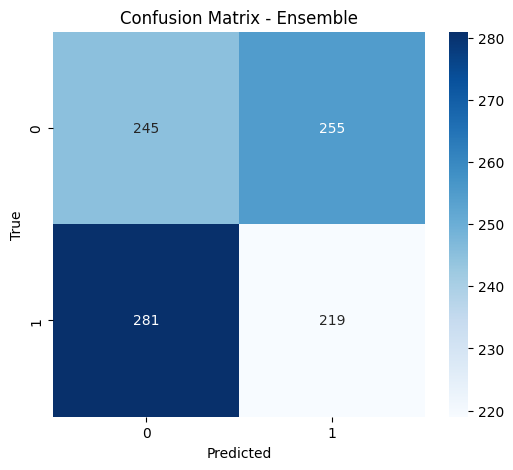

Classification Report - Ensemble:
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       500
           1       0.46      0.44      0.45       500

    accuracy                           0.46      1000
   macro avg       0.46      0.46      0.46      1000
weighted avg       0.46      0.46      0.46      1000



In [65]:
# Get predictions from each model on the validation set
val_generator.reset()  # Ensure the generator is at the start
vgg_preds = VGG16_model.predict(val_generator, verbose=1)

val_generator.reset()
resnet_preds = ResNet50_model.predict(val_generator, verbose=1)

val_generator.reset()
custom_cnn_preds = CUSTOM_CNN_model.predict(val_generator, verbose=1)

# Average the predictions for ensemble (soft voting)
ensemble_preds = (vgg_preds + resnet_preds + custom_cnn_preds) / 3.0

# Convert probabilities to class indices
y_true = val_generator.classes
y_pred_ensemble = np.argmax(ensemble_preds, axis=1)

# Evaluate Ensemble
cm = confusion_matrix(y_true, y_pred_ensemble)
class_labels = list(val_generator.class_indices.keys())
print("Confusion Matrix - Ensemble:")
print(cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Ensemble')
plt.show()

print("Classification Report - Ensemble:")
print(classification_report(y_true, y_pred_ensemble, target_names=class_labels))

# **Explainable AI**

## **Grad Cam**

In [66]:
# Choose the model for Grad-CAM (e.g., VGG16_model)
model_for_gradcam = VGG16_model

model_for_gradcam.summary()

gradcam_layer_name = 'block5_conv3'

val_generator.reset()
sample_batch = next(val_generator)
sample_images = sample_batch[0]
sample_labels = sample_batch[1]

img_array = sample_images[0]
true_label_index = np.argmax(sample_labels[0])

img_expanded = np.expand_dims(img_array, axis=0)

preds = model_for_gradcam.predict(img_expanded)
pred_class_idx = np.argmax(preds[0])
print(f"Predicted class index: {pred_class_idx}, True class index: {true_label_index}")

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   